<a href="https://colab.research.google.com/github/rajathAgalkote/MovieRecommendationSystem_EDA/blob/main/Rajathadri_MovieRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Movie Recommendation System**

## **Project Type** : 
## **Contribution** : Rajathadri A S
<br>

## **Datasets Used** : 
## 1. kaggle datasets download -d tmdb/tmdb-movie-metadata
## 2. kaggle datasets download -d rounakbanik/the-movies-dataset

## **Project Objective :**


## **Project Summary :**

## **Problem Statement :**

## **Coding :**

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import io
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.simplefilter('ignore')

In [2]:
# Initializing dataframes

df1 = pd.read_csv('/content/tmdb_5000_credits.csv')
df2 = pd.read_csv('/content/tmdb_5000_movies.csv')

## Feature Description :

<br>

**The first dataset (df1) contains the following features:-**

<br>

movie_id - A unique identifier for each movie.

cast - The name of lead and supporting actors.

crew - The name of Director, Editor, Composer, Writer etc.

<br>

**The second dataset (df2) has the following features:-**

<br>

budget - The budget in which the movie was made.

genre - The genre of the movie, Action, Comedy ,Thriller etc.

homepage - A link to the homepage of the movie.

id - This is infact the movie_id as in the first dataset.

keywords - The keywords or tags related to the movie.

original_language - The language in which the movie was made.

original_title - The title of the movie before translation or 
adaptation.

overview - A brief description of the movie.

popularity - A numeric quantity specifying the movie popularity.

production_companies - The production house of the movie.

production_countries - The country in which it was produced.

release_date - The date on which it was released.

revenue - The worldwide revenue generated by the movie.

runtime - The running time of the movie in minutes.

status - "Released" or "Rumored".

tagline - Movie's tagline.

title - Title of the movie.

vote_average - average ratings the movie recieved.

vote_count - the count of votes recieved.

In [3]:
# Dataframes first view

df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [5]:
df1.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [6]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [9]:
df1.shape

(4803, 4)

In [10]:
df2.shape

(4803, 20)

Both dataframes df1 and df2 have equal number of entries and are inter-related to each other. Let us merger the dataframes on 'movie_id' and 'id' column.

In [39]:
# Rename 'movie_id' column in df1 to match 'id' column in df2
df1 = df1.rename(columns={'movie_id':'id'}) 

df = df2.merge(df1, on=('id','title'))

In [43]:
df.shape

(4803, 22)

In [42]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

Finally, let us check our dataframe for duplicate and NULL values

In [13]:
# Checking for Duplicate Values

len(df[df.duplicated()])

0

In [14]:
# Checking for NULL values

print(df.isnull().sum())

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title_x                    0
vote_average               0
vote_count                 0
title_y                    0
cast                       0
crew                       0
dtype: int64


Total entries = 4803

Null in 'homepage' = 3091

Null in 'overview' = 3

Null in 'release_date' = 1

Null in 'runtime' = 2

Null in 'tagline' = 844

Let's plot a seaborn heatmap to understand NULL value distribution

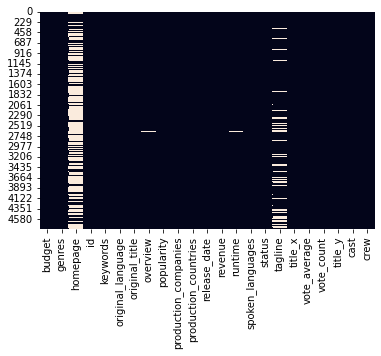

In [15]:
# Visualizing the missing values to confirm

sns.heatmap(df.isnull(), cbar=False)

Checking Skewness of the numeric features

In [16]:
numeric_features = df.describe().columns
numeric_features

Index(['budget', 'id', 'popularity', 'revenue', 'runtime', 'vote_average',
       'vote_count'],
      dtype='object')

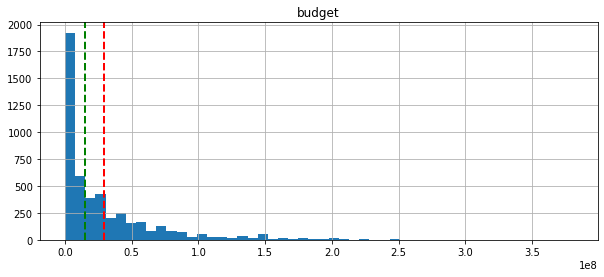

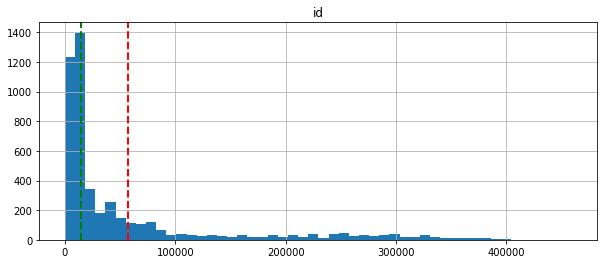

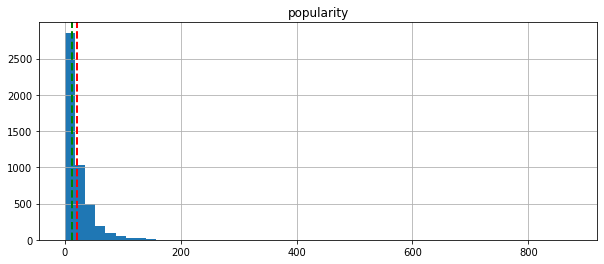

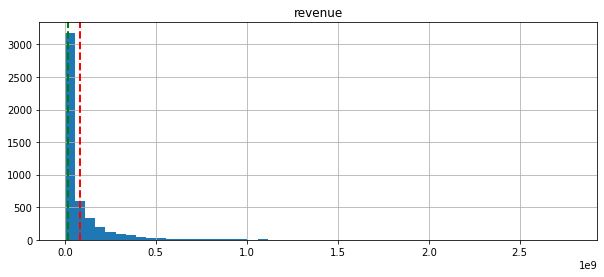

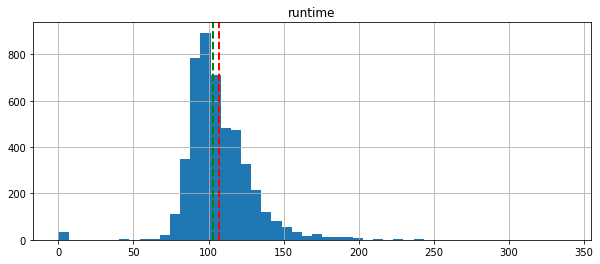

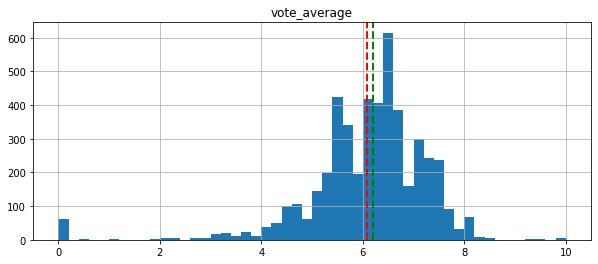

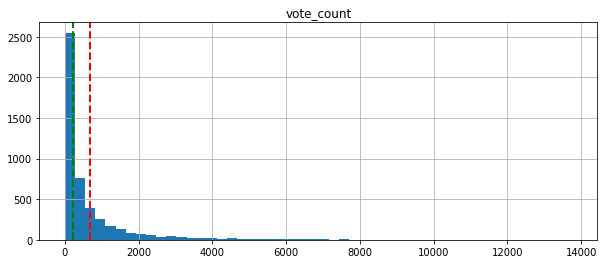

In [17]:
# plot a bar plot for each numerical feature count

for col in numeric_features[:]:
    fig = plt.figure(figsize=(10,4))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='green', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Independent features have "Data No Skew" with normal distribution.

Hence, a Linear Regression model is a possiblity.

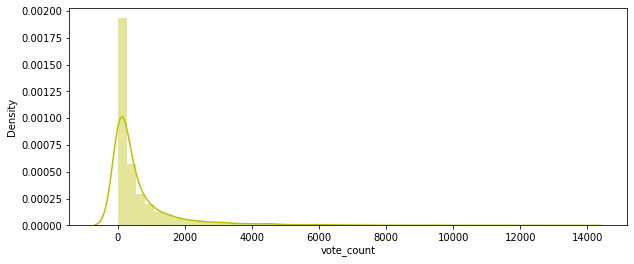

In [28]:
# Dependent variable 'vote_count'
plt.figure(figsize=(10,4))
sns.distplot(df['vote_count'], color="y")

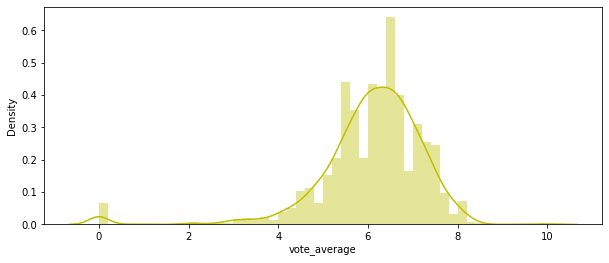

In [29]:
# Dependent variable 'vote_count'
plt.figure(figsize=(10,4))
sns.distplot(df['vote_average'], color="y")

Both Vote_count and vote_average are normally distributed and have "Data No Skew"

Recommendation model 01 :
## "The top rated movies of all time"

Let us define a weighted feature to rate each movie.

The existing features(vote_count & vote_average) are biased variables.

We'll be using IMDB defined weighted rating (WR) feature.

In [31]:
c = df['vote_average'].mean()
c

6.092171559442016

In [32]:
m= df['vote_count'].quantile(0.9)
m

1838.4000000000015

In [44]:
# Filtering Out movies that qualify IMDB's WR

qualified_movies = df.copy().loc[df['vote_count'] >= m]
qualified_movies.shape

(481, 22)

In [45]:
def weighted_rating(x, m=m, c=c):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * c)

In [46]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
qualified_movies['score'] = qualified_movies.apply(weighted_rating, axis=1)

In [47]:
#Sort movies based on score calculated above
q_movies = qualified_movies.sort_values('score', ascending=False)

#Print the top 10 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884




---

